----

# Descripción del proyecto

## Contexto 
Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

# Descripción de los datos

# Datos utilizados en la primera parte del proyecto

/datasets/hypotheses_us.csv Descarga el dataset

- Hypotheses: breves descripciones de las hipótesis
- Reach: alcance del usuario, en una escala del uno a diez
- Impact: impacto en los usuarios, en una escala del uno al diez
- Confidence: confianza en la hipótesis, en una escala del uno al diez
- Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

# Paso 1. Descarga los datos y prepáralos para el análisis
Almacena los datos de hypothesis, orders y visits en variables. Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.

## Preparación de los datos

### Importe de librerías, creación de DataFrames y revisión preliminar de la información:

In [198]:
#Importe de librerías a usar en el desarrollo del proyecto:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest
import math as mth


Si bien la primera parte del proyecto consiste en realizar un análisis sobre el dataset hypotheses_us, inicialmente se cargarán todos los datasets en 3 dataframes distintos.

In [24]:
#Lectura de datasets como fuente de datos y creación de DataFrames a desarrollar:


# De manera preliminar se evidencia que el dataset hypotheses_us tiene almacenada la información a través de separadores de tipo ';':

hypotheses = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/hypotheses_us.csv', sep=';')  # ---> Argumento sep usado porque el dataset contiene ;

orders = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_us.csv')

visits = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_us.csv')

In [27]:
#Revisión general de la información:

#Revisión del primer dataset:

hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [28]:
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


El dataset **hypotheses_us** almacenado ahora en el DataFrame **hypotheses** contiene 9 registros con 5 columnas, de las cuales sólo 1 es del tipo object y el resto son de tipo entero. No hay datos nulos en ningún registro.

Para mejorar la calidad de la información este dataset será estandarizado con:

- Columnas con nombres tipo snake_case
- La columna tipo 'Object' ('Hypothesis') será pasada a tipo 'Category' para obtener un [mejor procesamiento de los datos](https://pfr.com.ar/dtypes/).

In [29]:
#Revisión del segundo dataset:

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [30]:
display(orders.sample(20))

,transactionId,visitorId,date,revenue,group
186,3306480450,206724078,2019-08-17,55.7,B
696,198999602,3659263677,2019-08-09,40.8,A
370,857639553,2044997962,2019-08-24,40.1,A
1166,2676541142,471551937,2019-08-14,55.2,B
499,2122398532,1937307986,2019-08-04,150.4,A
543,3678943889,417213830,2019-08-29,100.7,A
672,3667885894,1230306981,2019-08-09,105.7,A
1052,375844049,600884435,2019-08-11,225.9,B
1122,3620682463,2654030115,2019-08-13,35.5,B
30,1678838030,4027395615,2019-08-15,5.9,B


El dataset **orders_us** almacenado ahora en el DataFrame **orders** contiene 1197 registros con 5 columnas, de las cuales sólo 2 son del tipo object, 2 son del tipo entero y otro tipo float. No hay datos nulos en ningún registro.

Para mejorar la calidad de la información este dataset será estandarizado con:

- Columnas con nombres tipo snake_case
- La columna tipo 'Object' ('date') será pasada a tipo 'datetime' para poderlo procesar como fecha.
- La columna tipo 'Object' ('group') será pasada a tipo 'Category' para obtener un [mejor procesamiento de los datos](https://pfr.com.ar/dtypes/).


In [31]:
#Revisión del tercer dataset:

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [32]:
display(visits.sample(20))

,date,group,visits
59,2019-08-29,B,531
11,2019-08-12,A,595
42,2019-08-12,B,543
43,2019-08-13,B,769
26,2019-08-27,A,711
16,2019-08-17,A,412
44,2019-08-14,B,746
21,2019-08-22,A,609
57,2019-08-27,B,720
32,2019-08-02,B,581


El dataset **visits_us** almacenado ahora en el DataFrame **visits** contiene 62 registros con 3 columnas, de las cuales sólo 2 son del tipo object, y la otra del tipo entero. No hay datos nulos en ningún registro.

Para mejorar la calidad de la información este dataset será estandarizado con:

- La columna tipo 'Object' ('date') será pasada a tipo 'datetime' para poderlo procesar como fecha.
- La columna tipo 'Object' ('group') será pasada a tipo 'Category' para obtener un [mejor procesamiento de los datos](https://pfr.com.ar/dtypes/).


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con esta revisión inicial de la data

</div>

### Datos Nulos

Es importante destacar que cuando usamos el método .info() en cada Dataframe pudimos notar que no existen datos nulos en ningún registro de los 3 Dataframes creados.

### Optimización de la información

En este apartado, buscaremos optimizar la velocidad de procesamiento de los datasets con el fin de utilizar la menor cantidad de recursos de nuestra PC. Como pudimos ver en la revisión preliminar de los datos, en 2 Dataframes podemos sustituir al menos una columna al tipo datetime, y en el primer dataset al tipo Category en la columna 'Hypothesis'.

In [23]:
# Optimización en primer Dataframe:

hypotheses['Hypothesis'] = hypotheses['Hypothesis'].astype("category") #---> Transformación del tipo Object a Category en la columna 'Hypothesis'

hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Hypothesis  9 non-null      category
 1   Reach       9 non-null      int64   
 2   Impact      9 non-null      int64   
 3   Confidence  9 non-null      int64   
 4   Effort      9 non-null      int64   
dtypes: category(1), int64(4)
memory usage: 797.0 bytes


In [33]:
# Optimización en segundo Dataframe:

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) #---> Transformación al tipo datetime en la columna 'date'

orders['group'] = orders['group'].astype("category") #---> Transformación al tipo category de la columna 'group'

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.8 KB


In [34]:
# Optimización en tercer Dataframe:

visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) #---> Transformación al tipo datetime en la columna 'date'

visits['group'] = visits['group'].astype("category") #---> Transformación al tipo category de la columna 'group'

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.3 KB


### Consideraciones adicionales

1. Los nombres de las columnas serán transformados a un formato snake_case y pasado a minúsculas.
2. Se revisarán los casos de los datos duplicados en cada dataset.

#### 1. Estandarización de columnas 

In [36]:
#Se corregirán los nombres de las columnas a través de una función llamada standarized_columns. Así se corregirán los datos independiente del número de columnas almacenadas en el DataFrame:


def standarized_columns(columns):  # Función para reemplazar columnas de cualquier DataFrame con el formato deseado

    revised_col_names = []  #---> Lista para almacenar los nombres de columnas corregidos

    for old_name in columns:
        name_stripped = old_name.strip() #Eliminación de espacios en nombres de columnas
        name_lowered = name_stripped.lower() #Transformación de columnas a minúsculas
        snake_case_format = name_lowered.replace(' ', '_') #Reemplazo de espacios con un guión bajo '_'
        revised_col_names.append(snake_case_format)     
    return revised_col_names  

In [37]:
# Estandarización del formato a través del uso de la función standarized_columns:

hypotheses.columns = standarized_columns(hypotheses) # Estandarización primer DataFrame

orders.columns = standarized_columns(orders) # Estandarización segundo DataFrame

visits.columns = standarized_columns(visits) # Estandarización tercer DataFrame

In [38]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [39]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.8 KB


In [41]:
#Paso adicional para corregir las 2 primeras columnas:

orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.8 KB


In [40]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.3 KB


Todos los dataframes contienen el formato snake_case en cada una de sus columnas.

#### 2. Revisión de datos duplicados

In [44]:
# Revisión de número de registros duplicados en el primer dataframe:

hypotheses.duplicated().sum()

0

In [45]:
# Revisión de número de registros duplicados en el segundo dataframe:

orders.duplicated().sum()

0

In [48]:
# Revisión de número de registros duplicados en el tercer dataframe:

visits.duplicated().sum()

0

Los 3 Dataframes están listos ahora para ser analizados.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, muy bien con las modificaciones iniciales de la data.

</div>

# Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

- Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

## Aplicación Framework ICE


Teniendo en cuenta que ICE es igual a:

ICE = (Impact x Confidence / Effort)

Se procede a realizar el cálculo de ICE

In [53]:
#Cálculo de ICE

hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

ICE = hypotheses[['hypothesis','ICE']].sort_values(by= 'ICE', ascending=False)

display(ICE)

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


## Aplicación Framework RICE


Teniendo en cuenta que RICE es igual a:

RICE = (Reach x Impact x Confidence / Effort)

Se procede a realizar el cálculo de RICE

In [54]:
#Cálculo de RICE

hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

RICE = hypotheses[['hypothesis','RICE']].sort_values(by= 'RICE', ascending=False)

display(RICE)

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


En este caso podemos ver como cambian los niveles de priorización cuando aplicamos el método ICE versus el método RICE.

Mientras que en ICE los niveles de priorización pasan por 
1: "Dar promociones y descuentos a los usuarios en su cumpleaños", 
2: "Adicionar dos canales para atraer nuevo tráfico"
3: "Adicionar un formulario de suscripción a las páginas principales"

En Rice los niveles de priorización principales son:

1: "Adicionar un formulario de suscripción a las páginas principales"
2: "Adicionar bloques de productos recomendado para aumentar los niveles de conversión y los tamaños de compra"
3: "Adicionar dos canales para atraer nuevo tráfico"


Si bien los niveles de priorización cambian de un método a otro, podemos destacar que en sus niveles máximos de priorización están las hipótesis de "Adicionar dos canales para atraer nuevo tráfico" y "Adicionar un formulario de suscripción a las páginas principales" (es decir las hipótesis 7 y la hipótesis 0). Las diferencias radican en que el método RICE utiliza un componente adicional, el de alcance, que pretende conocer cuantos de los clientes se beneficiarán de un evento o característica en particular.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto. Idealmente estos se pueden comparar con un scatterplot

</div>

# Datos utilizados en la segunda parte del proyecto

 /datasets/orders_us.csv Descarga el dataset

- transactionId: identificador de pedido
- visitorId: identificador del usuario que realizó el pedido
- date: fecha del pedido
- revenue: ingresos del pedido
- group: el grupo del test A/B al que pertenece el usuario

/datasets/visits_us.csv Descarga el dataset

- date: la fecha
- group: grupo del test A/B
- visits: el número de visitas en la fecha especificada para el grupo de test A/B especificado


Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

# Parte 2. Análisis de test A/B
Realizaste un test A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visitors_us.csv.



## Analiza el test A/B:

1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

### 1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [79]:
# Para poder realizar dichas gráficas, antes es necesario calcular los visitantes para cada grupo. También hay que tener en cuenta aquellos visitantes que pudieron estar en ambos grupos y excluirlos:

visitors_group_A = set(orders[orders['group'] == 'A']['visitor_id']) # Filtrado de visitantes del grupo A
visitors_group_B = set(orders[orders['group'] == 'B']['visitor_id']) # Filtrado de visitantes del grupo B


# Identificar los visitantes que están en ambos grupos
common_visitors = visitors_group_A.intersection(visitors_group_B)
print(f"El número de visitantes que estuvieron en ambos grupos es de: ", len(common_visitors))

#Excluir aquellos visitantes que estuvieron en ambos grupos:

orders_for_ab_testing = orders[~orders['visitor_id'].isin(common_visitors)]

print()
print(orders_for_ab_testing.info())

El número de visitantes que estuvieron en ambos grupos es de:  58

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   float64       
 4   group           1016 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 40.8 KB
None


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, siempre hay que revisar usuarios repetidos en tests A/B

</div>

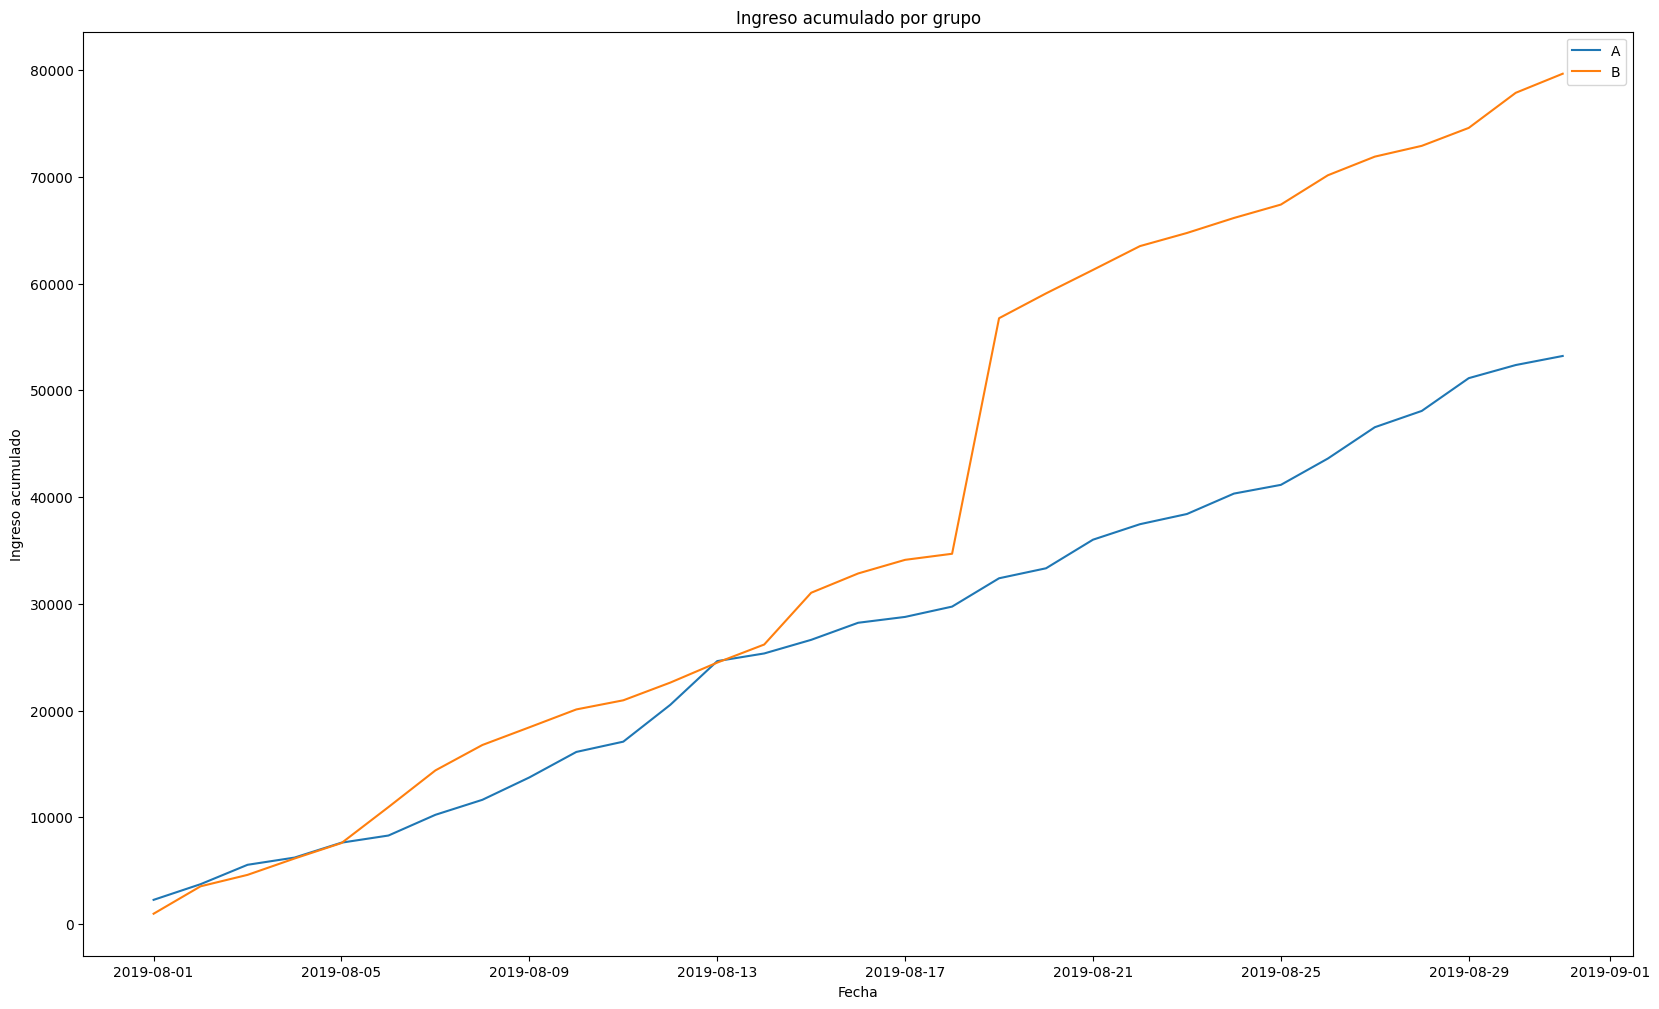

In [104]:
# Representación gráfica del ingreso acumulado por grupo

accum_income_gp_a = orders_for_ab_testing[orders_for_ab_testing['group'] == 'A'].groupby('date').agg({'revenue':'sum'}).cumsum()
accum_income_gp_b = orders_for_ab_testing[orders_for_ab_testing['group'] == 'B'].groupby('date').agg({'revenue':'sum'}).cumsum()

plt.figure(figsize=(20,12))
plt.plot(accum_income_gp_a, label='A')
plt.plot(accum_income_gp_b, label='B')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.title('Ingreso acumulado por grupo')
plt.legend()


plt.show()


Acá podemos ver como el grupo B empieza a obtener mayores ingresos comparativamente al grupo A en la fecha cercana al 13 de agosto (tercera semana de la prueba) y se termina de consoldar desde el 17 de agosto (cuarta semana de la prueba).

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto! Ese día se separan mucho los grupos

</div>

### 2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

In [99]:
# De manera similar al cálculo anterior, podemos obtener el tamaño de pedido promedio primero filtrando por grupo y obteniendo las sumas de revenue y el conteo del número de transacciones realizadas:

cumulative_orders_a = orders_for_ab_testing[orders_for_ab_testing['group'] == 'A'].groupby('date').agg({'revenue':'sum', 'transaction_id':'count'}).cumsum().reset_index()
cumulative_orders_a.columns = ['date', 'revenue', 'orders']

cumulative_orders_b = orders_for_ab_testing[orders_for_ab_testing['group'] == 'B'].groupby('date').agg({'revenue':'sum', 'transaction_id':'count'}).cumsum().reset_index()
cumulative_orders_b.columns = ['date', 'revenue', 'orders']


#Agregación de columna con el tamaño de pedido promedio acumulado:
cumulative_orders_a['avg_order_size'] = cumulative_orders_a['revenue'] / cumulative_orders_a['orders']
cumulative_orders_b['avg_order_size'] = cumulative_orders_b['revenue'] / cumulative_orders_b['orders']


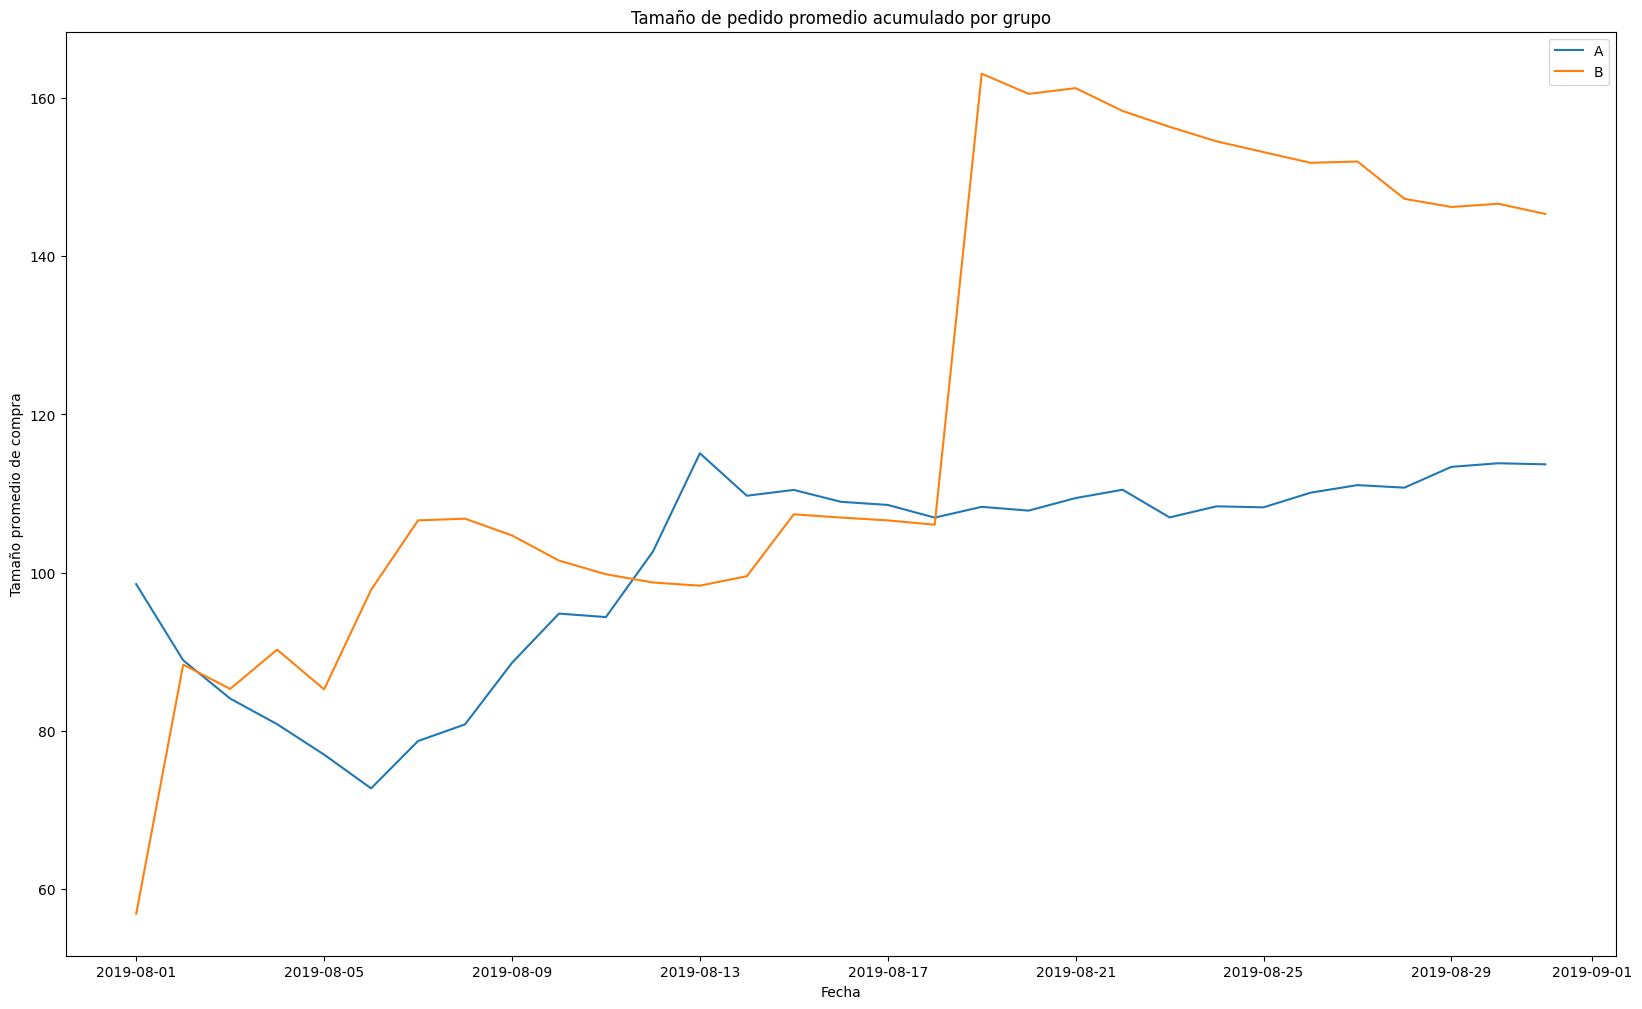

In [103]:
# Representación gráfica del tamaño de pedido promedio acumulado:

plt.figure(figsize=(20, 12))
plt.plot(cumulative_orders_a['date'], cumulative_orders_a['avg_order_size'], label='A')
plt.plot(cumulative_orders_b['date'], cumulative_orders_b['avg_order_size'], label='B')
plt.legend()
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio de compra')

plt.show()

Al igual que el ingreso acumulado por grupo, el comportamiento en el grupo B se consolida desde la cuarta semana (desde el 17 de agosto). Alcanza un pico de ingreso por compra de 160 en la cuarta semana y se empieza a estabilizar en valores cercanos a 140. Mientras que el grupo A se estabiliza en valores cercanos a 110 de ingreso por compra.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto! el mismo día observado anteriormente hay algo que hace que B se despegue

</div>

### 3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

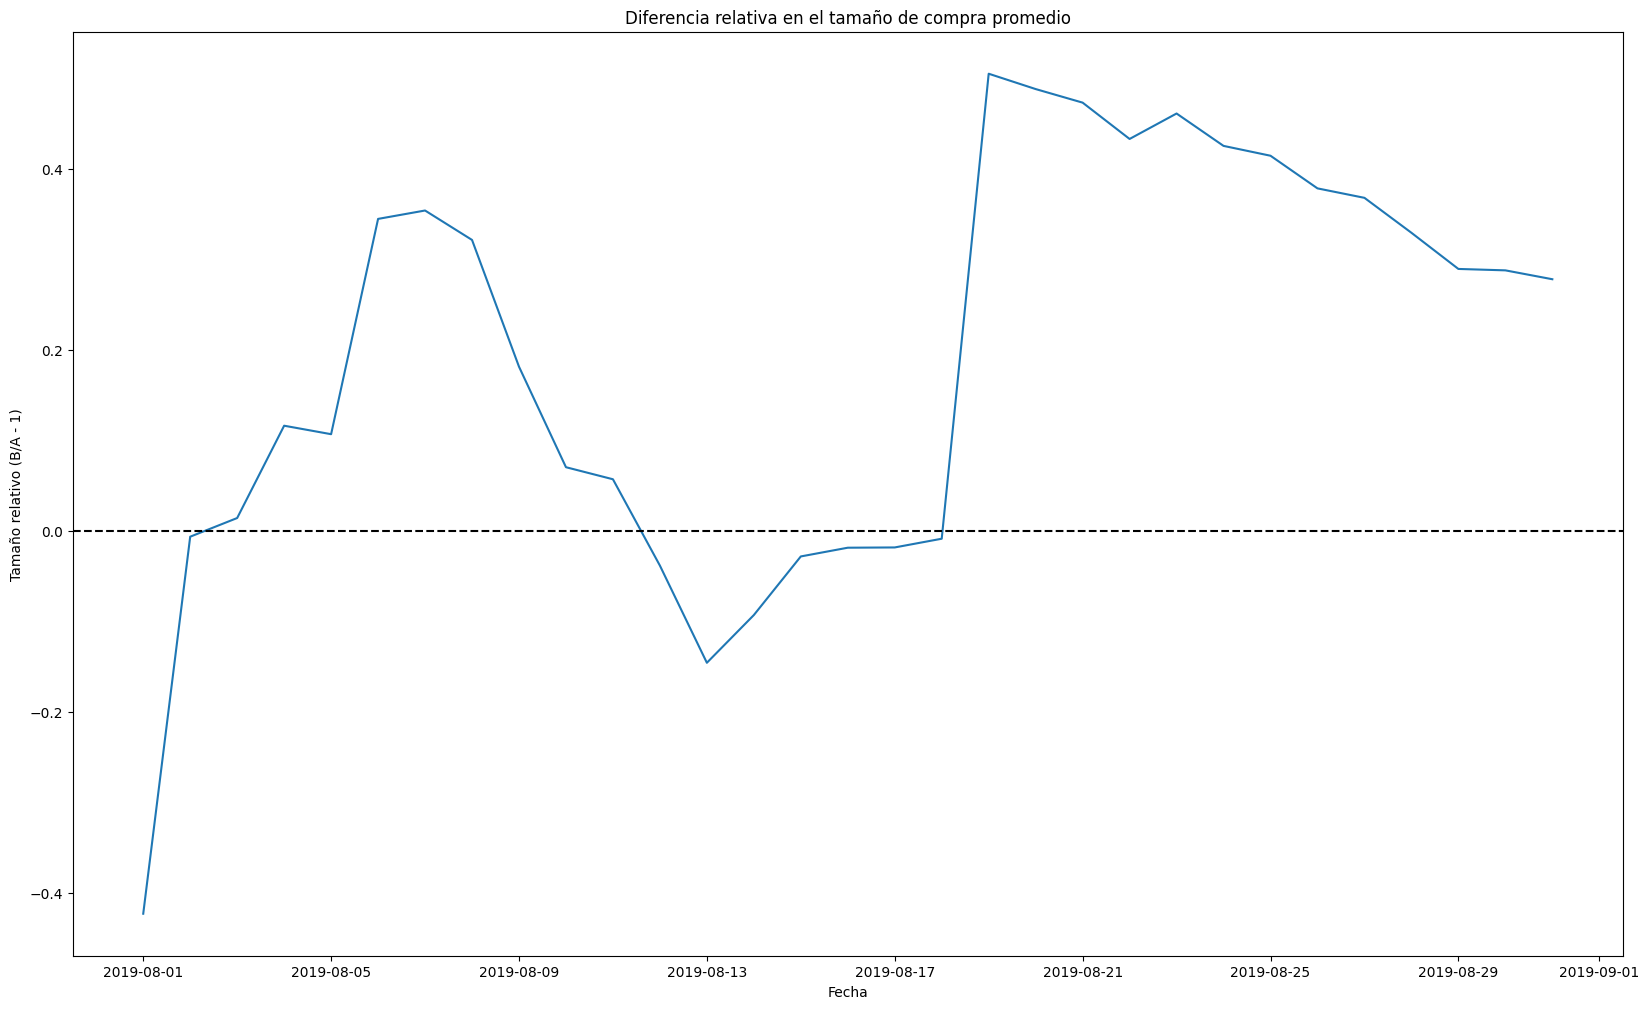

In [112]:
# Para este caso realizaremos un merge que una los Dataframes cumulative_orders_a y cumulative_orders_b:

mergedCumulativeRevenue = cumulative_orders_a.merge(cumulative_orders_b, left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

# Agregación de columna de tamaño promedio relativo [(B / A) - 1]:

mergedCumulativeRevenue['relative_order_size_B/A-1'] = ((mergedCumulativeRevenue['avg_order_size_B'] / mergedCumulativeRevenue['avg_order_size_A']) - 1)


# Gráfico de la diferencia en el tamaño relativo entre B y A

plt.figure(figsize=(20, 12))
plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['relative_order_size_B/A-1'])
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Tamaño relativo (B/A - 1)')
plt.title('Diferencia relativa en el tamaño de compra promedio')

plt.show()

La diferencia relativa de los resultados de la prueba del grupo B respecto al grupo A muestra un cambio considerable superior al 50% en los resultados durante la semana 4 (17 de agosto). Sin embargo a diferencia de los gráficos anteriores, en la semana del 13 de agosto (semana 3) se evidencia un pico mínimo del grupo B respecto al A. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien!

</div>

### 4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

In [120]:
# Inicialmente calcularemos para el grupo A y el grupo B el número de transacciones realizadas (compras):

orders_a = orders_for_ab_testing[orders_for_ab_testing['group'] == 'A'].groupby('date')['transaction_id'].count().reset_index()
orders_a.columns = ['date', 'orders']

orders_b = orders_for_ab_testing[orders_for_ab_testing['group'] == 'B'].groupby('date')['transaction_id'].count().reset_index()
orders_b.columns = ['date', 'orders']

# Ahora usaremos el Dataframe visits para calcular las visitas por grupo:

visits_a = visits[visits['group'] == 'A']
visits_b = visits[visits['group'] == 'B']

# Fusión de ambos dataframes:

orders_per_visit_a = orders_a.merge(visits_a, on='date')
orders_per_visit_b = orders_b.merge(visits_b, on='date')

# Agregación de la columna 'conversion' a ambos dataframes:

orders_per_visit_a['conversion'] = orders_per_visit_a['orders'] / orders_per_visit_a['visits']
orders_per_visit_b['conversion'] = orders_per_visit_b['orders'] / orders_per_visit_b['visits']


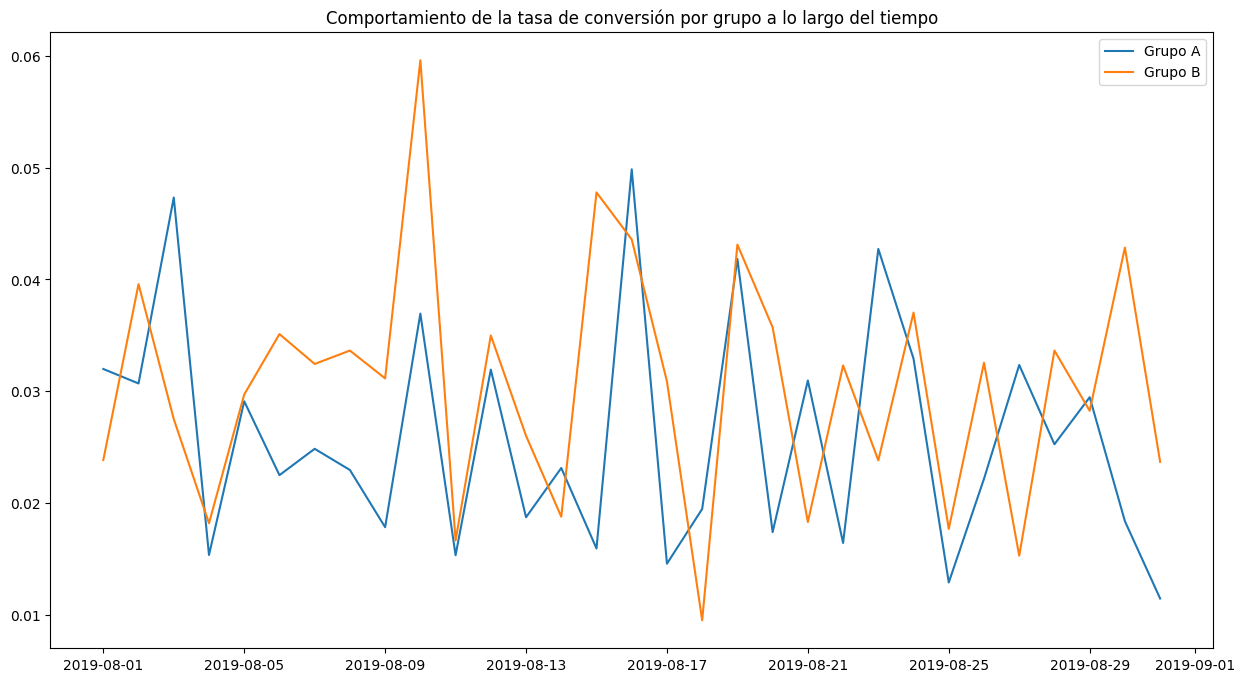

In [133]:
# Representación gráfica de la conversión:

plt.figure(figsize=(15, 8))
plt.plot(orders_per_visit_a['date'], orders_per_visit_a['conversion'], label='Grupo A')
plt.plot(orders_per_visit_b['date'], orders_per_visit_b['conversion'], label='Grupo B')
plt.title('Comportamiento de la tasa de conversión por grupo a lo largo del tiempo')

plt.legend()


El comportamiento de conversión es muy similar entre ambos grupos. En fechas similares se presentan picos en el número de compras por visitas.

(18109.0, 18140.0, -1.0, 2.5)

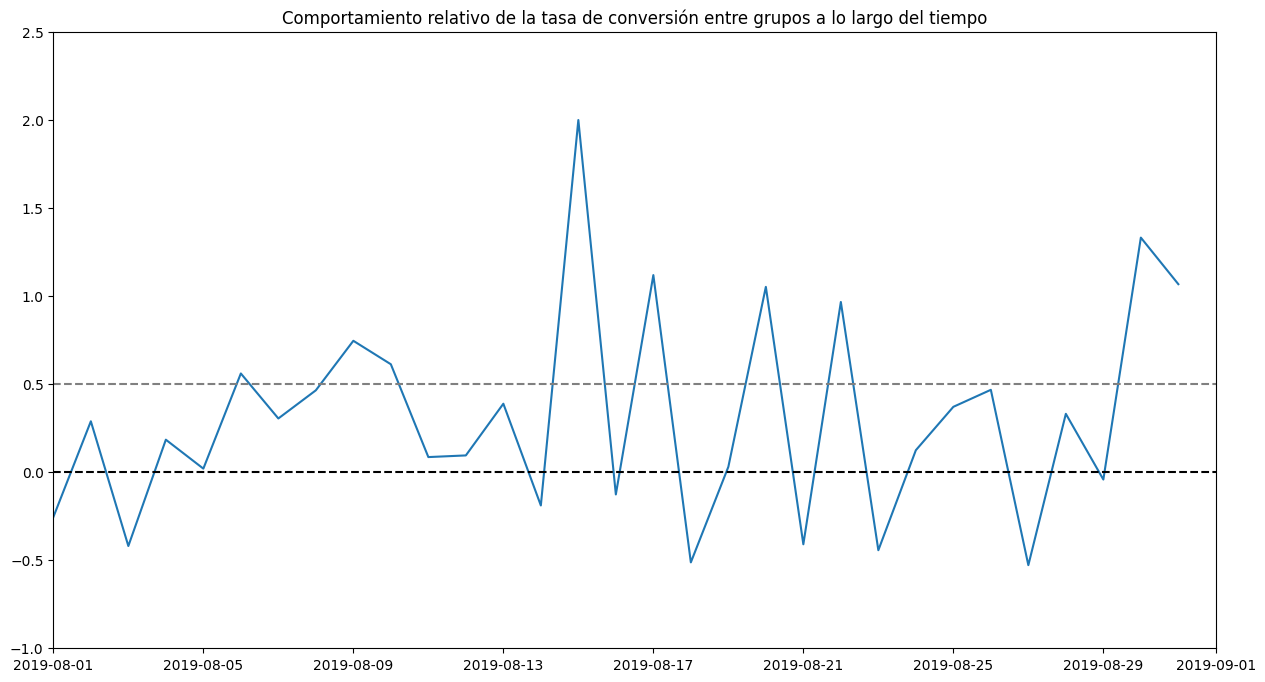

In [142]:
#Ahora procederemos de la misma forma que el tamaño de compra relativo, a calcular la conversión relativa entre grupos

mergedCumulativeConversions = orders_per_visit_a[['date', 'conversion']].merge(orders_per_visit_b[['date', 'conversion']], left_on='date', right_on='date', suffixes = ['_A', '_B'])

mergedCumulativeConversions['relative_conversion_B/A-1'] = ((mergedCumulativeConversions['conversion_B'] / mergedCumulativeConversions['conversion_A']) - 1)


plt.figure(figsize=(15, 8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['relative_conversion_B/A-1'])
plt.title('Comportamiento relativo de la tasa de conversión entre grupos a lo largo del tiempo')

plt.axhline(y= 0, color='black', linestyle='--')
plt.axhline(y= 0.5, color='grey', linestyle='--')

plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -1.0, 2.5])

A la hora de hacer la comparativa entre conversiones relativas, vemos que hay picos del grupo B que son exageradamente mayores a los del grupo A.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien!

</div>

### 5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [156]:
# Para este caso agruparemos las transacciones únicas por los visitantes para determinar los números de pedidos por usuario:

orders_by_users = (orders_for_ab_testing.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))

orders_by_users.columns = ['visitor_id', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10))
print()
print(orders_by_users.info())

     visitor_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   visitor_id  973 non-null    int64
 1   orders      973 non-null    int64
dtypes: int64(2)
memory usage: 15.3 KB
None


El número de pedidos máximos por usuario es de 3 pedidos.

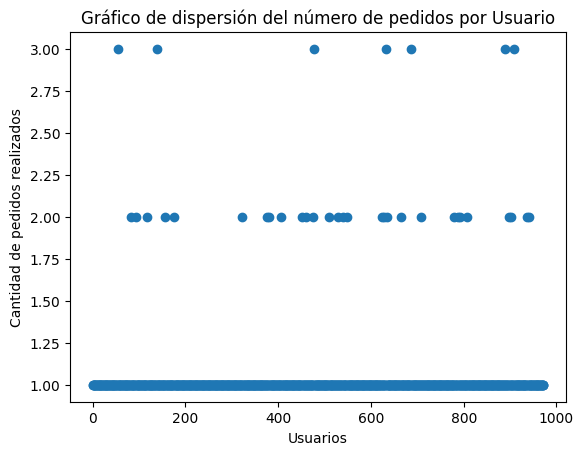

In [173]:
# Para el gráfico de dispersión usaremos un rango de valores determinado para el eje x, de 0 al número de órdenes totales:

x_values_orders_by_users = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values_orders_by_users, orders_by_users['orders'])
plt.xlabel('Usuarios')
plt.ylabel('Cantidad de pedidos realizados')
plt.title('Gráfico de dispersión del número de pedidos por Usuario')



plt.show()


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien!

</div>

### 6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [179]:
# Crearemos una variable que almacene el cálculo de los percentiles:

percentiles_95_99_orders_by_users = orders_by_users['orders'].quantile([.95, .99])
print(percentiles_95_99_orders_by_users)

0.95    1.0
0.99    2.0
Name: orders, dtype: float64


No más del 5% de los usuarios realizaron más de 1 pedido, y el 1% de los usuarios hizo 2 o más pedidos. Esto quiere decir que el 95% de los usuarios hace 1 pedido solamente.

### 7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

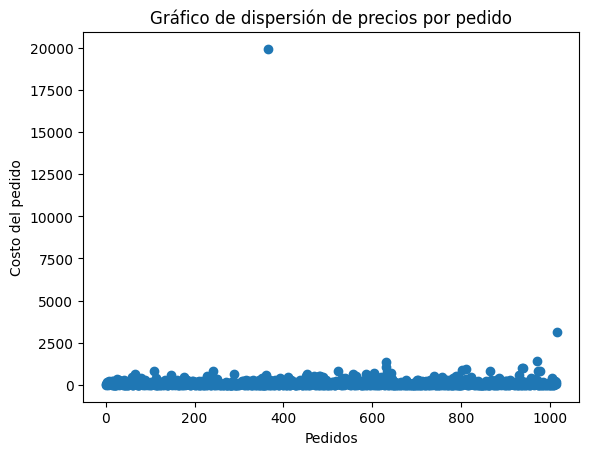

In [181]:
# En este caso usaremos orders_for_ab_testing['revenue'] para determinar el rango de valores en el eje x y los precios por producto:

x_values_prices_by_orders = pd.Series(range(0,len(orders_for_ab_testing['revenue'])))

plt.scatter(x_values_prices_by_orders, orders_for_ab_testing['revenue'])
plt.xlabel('Pedidos')
plt.ylabel('Costo del pedido')
plt.title('Gráfico de dispersión de precios por pedido')



plt.show()

La gran mayoría de los pedidos ni siquiera alcanza los 2500. Sin embargo, para determinar los datos anómalos es necesario saber los percentiles 95 y 99

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, ese outlier probablemente es el que causa la diferencia tan notoria entre los grupos a partir del 17/08

</div>

### 8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [180]:
# De manera similar al cálculo de percentiles anterior, calcularemos los percentiles 95 y 99 para los precios de los pedidos,

percentiles_95_99_prices_by_orders = orders_for_ab_testing['revenue'].quantile([.95, .99])
print(percentiles_95_99_prices_by_orders)

0.95    414.275
0.99    830.300
Name: revenue, dtype: float64


En este caso, como se puede ver, el 99% de los usuarios no hizo pedidos superiores a 830.300 y el 95% de los usuarios no hizo pedidos superiores a los 414.275.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto

</div>

### 9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [206]:
# Para obtener la conversión por grupo es necesario obtener el total de visitas por grupo y el número de órdenes totales por grupo:

# Cálculo del número de pedidos realizados por grupo:

original_total_orders_a = orders[orders['group'] == 'A']['transaction_id'].count() # Los datos en bruto pertenecen al dataframe orders
original_total_orders_b = orders[orders['group'] == 'B']['transaction_id'].count() # Los datos en bruto pertenecen al dataframe orders 

# Cálculo de las visitas totales por grupo:
 
total_visits_a = visits[visits['group'] == 'A']['visits'].sum()
total_visits_b = visits[visits['group'] == 'B']['visits'].sum()

# Cálculo de la conversión por grupo:

original_conversion_a = original_total_orders_a / total_visits_a
original_conversion_b = original_total_orders_b / total_visits_b

print(original_conversion_a)
print(original_conversion_b)

0.029728864218616567
0.033833791499259885


In [207]:
# Cálculo del estadístico usando Ztest:

total_visits = [total_visits_a, total_visits_b]
original_total_orders = [original_total_orders_a, original_total_orders_b]


z_stat, p_val = proportions_ztest(original_total_orders, total_visits)

print("Estadístico Z:", z_stat)
print("Valor p:", p_val)

Estadístico Z: -2.270005753735332
Valor p: 0.02320723394441847


Si establecemos como H0 que la conversión entre el grupo A y B es la misma, con un alpha = 0.05, a través del cálculo de la prueba Z_test podemos concluir que como el valor p es muy inferior a alpha, podemos rechazar la hipótesis nula. La conversión difiere entre grupos para los datos en bruto.

### 10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [208]:
<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto

</div>original_orders_size_a = orders[orders['group'] == 'A']['revenue'].mean()
original_orders_size_b = orders[orders['group'] == 'B']['revenue'].mean()

print('Tamaño de orden promedio A para los datos en bruto:', original_orders_size_a )
print('Tamaño de orden promedio B para los datos en bruto:', original_orders_size_b )


t_test, p_value = st.ttest_ind(orders[orders['group'] == 'A']['revenue'], 
                                  orders[orders['group'] == 'B']['revenue'], equal_var=False)

print('valor p', p_value)

Tamaño de orden promedio A para los datos en bruto: 115.89748653500898
Tamaño de orden promedio B para los datos en bruto: 145.06343750000002
valor p 0.3745072295652421


A través de una prueba t_test podemos establecer que el tamaño de orden promedio para los grupos supera en gran proporción a un alpha = 0.05, por lo cual no podemos rechazar la hipótesis de que el tamaño de orden promedio es igual entre el grupo A y B (para los datos en bruto).

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto

</div>

### 11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [209]:
# Para obtener la conversión por grupo es necesario obtener el total de visitas por grupo y el número de órdenes totales por grupo:

# Cálculo del número de pedidos realizados por grupo:

filtered_total_orders_a = orders_for_ab_testing[orders_for_ab_testing['group'] == 'A']['transaction_id'].count() # Los datos filtrados pertenecen al dataframe orders_for_ab_testing 
filtered_total_orders_b = orders_for_ab_testing[orders_for_ab_testing['group'] == 'B']['transaction_id'].count() # Los datos filtrados pertenecen al dataframe orders_for_ab_testing 

# Cálculo de la conversión por grupo:

filtered_conversion_a = filtered_total_orders_a / total_visits_a
filtered_conversion_b = filtered_total_orders_b / total_visits_b

print(filtered_conversion_a)
print(filtered_conversion_b)

0.02497865072587532
0.02897018397124128


In [210]:
# Cálculo del estadístico usando Ztest:

total_visits = [total_visits_a, total_visits_b]
filtered_total_orders = [filtered_total_orders_a, filtered_total_orders_b]


z_stat, p_val = proportions_ztest(filtered_total_orders, total_visits)

print("Estadístico Z:", z_stat)
print("Valor p:", p_val)

Estadístico Z: -2.3899344431697442
Valor p: 0.01685138043470311


Si establecemos como H0 que la conversión entre el grupo A y B es la misma, con un alpha = 0.05, a través del cálculo de la prueba Z_test podemos concluir que como el valor p es muy inferior a alpha, podemos rechazar la hipótesis nula. La conversión difiere entre grupos para los datos filtrados.

### 12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [211]:
filtered_orders_size_a = orders_for_ab_testing[orders_for_ab_testing['group'] == 'A']['revenue'].mean()
filtered_orders_size_b = orders_for_ab_testing[orders_for_ab_testing['group'] == 'B']['revenue'].mean()


print('Tamaño de orden promedio A para los datos filtrados:', filtered_orders_size_a )
print('Tamaño de orden promedio B para los datos filtrados:', filtered_orders_size_b )


t_test, p_value = st.ttest_ind(orders_for_ab_testing[orders_for_ab_testing['group'] == 'A']['revenue'], 
                                  orders_for_ab_testing[orders_for_ab_testing['group'] == 'B']['revenue'], equal_var=False)

print('valor p', p_value)

Tamaño de orden promedio A para los datos filtrados: 113.70085470085469
Tamaño de orden promedio B para los datos filtrados: 145.34890510948907
valor p 0.4043438730780975


Al igual que en el punto 10: A través de una prueba t_test podemos establecer que el tamaño de orden promedio para los grupos supera en gran proporción a un alpha = 0.05, por lo cual no podemos rechazar la hipótesis de que el tamaño de orden promedio es igual entre el grupo A y B (para los datos filtrados).

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, muy bien con los tests!

</div>

## Conclusiones
### 13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

A través de las diversas pruebas, gráficas y estadísticas calculadas podemos concluir que:

- La tasa de conversión entre los grupos no es la misma. De hecho a través de las gráficas ya se podía inferir que los resultados en el grupo B eran más rentables a comparación del grupo A (en el comportamiento relativo de la tasa de conversión). La prueba estadística confirma que hay una diferencia significativa que descarta que en promedio las tasas de conversión sean iguales.

- El tamaño de promedio de las compras no varía: No hubo resultados estadísticos que demostraran diferencias entre los grupos en este aspecto.

- Es más probable que tengamos mejor probabilidad de éxito(ordenes) por cada visita de grupo B en comparación a grupo A

- Tal y como se ve en el gráfico del tamaño de orden relativa entre A y B, existe un punto de quiebre que inclina la balanza hacia el grupo B a obtener mejores resultados a través del tiempo.

Dado ese panorama, podríamos decidir detener la prueba y considerar el grupo B como aquél que de manera relativa obtiene mejores resultados; ya que si bien no hay diferencia significativa entre las ganancias por pedido, el hecho de tener una mejor tasa de conversión para B (una mejor probabilidad de tener ordenes) puede compensar el primer punto y obtener ganancias significativas dedicando mayor énfasis en las posibles mejoras a futuro en el grupo B.